In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import  seaborn as sn 
from  sklearn.ensemble import RandomForestRegressor

In [3]:
fifa_19=pd.read_csv(r'cleaned_data/players_19.csv',index_col='Unnamed: 0')
fifa_19.head()
fifa_20=pd.read_csv(r'cleaned_data/players_20.csv',index_col='Unnamed: 0')
fifa_20.head()

/tmp/ipykernel_401/3404989304.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_19=pd.read_csv(r'cleaned_data/players_19.csv',index_col='Unnamed: 0')


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,player_positions_gk,player_positions_cdm,player_positions_rm,player_positions_lm,player_positions_cm,player_positions_lw,player_positions_lb,player_positions_rb,player_positions_lwb,preferred_foot_bin
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,0,0,0,0,0,0,0,0,0,1
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,0,0,0,0,0,1,0,0,0,0
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,0,0,0,0,0,1,0,0,0,0
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,1,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,0,0,0,0,0,1,0,0,0,0


In [22]:
useful_features=['age',
 'height_cm',
 'weight_kg',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'player_positions_cb',
 'player_positions_rwb',
 'player_positions_cf',
 'player_positions_st',
 'player_positions_rw',
 'player_positions_cam',
 'player_positions_gk',
 'player_positions_cdm',
 'player_positions_rm',
 'player_positions_lm',
 'player_positions_cm',
 'player_positions_lw',
 'player_positions_lb',
 'player_positions_rb',
 'player_positions_lwb',
 'preferred_foot_bin']

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='height_cm', ylabel='age'>,
        <AxesSubplot:xlabel='weight_kg', ylabel='age'>, ...,
        <AxesSubplot:xlabel='player_positions_rb', ylabel='age'>,
        <AxesSubplot:xlabel='player_positions_lwb', ylabel='age'>,
        <AxesSubplot:xlabel='preferred_foot_bin', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='height_cm'>,
        <AxesSubplot:xlabel='height_cm', ylabel='height_cm'>,
        <AxesSubplot:xlabel='weight_kg', ylabel='height_cm'>, ...,
        <AxesSubplot:xlabel='player_positions_rb', ylabel='height_cm'>,
        <AxesSubplot:xlabel='player_positions_lwb', ylabel='height_cm'>,
        <AxesSubplot:xlabel='preferred_foot_bin', ylabel='height_cm'>],
       [<AxesSubplot:xlabel='age', ylabel='weight_kg'>,
        <AxesSubplot:xlabel='height_cm', ylabel='weight_kg'>,
        <AxesSubplot:xlabel='weight_kg', ylabel='weight_kg'>, ...,
        <AxesSubplot:xlabel='player_positions_r

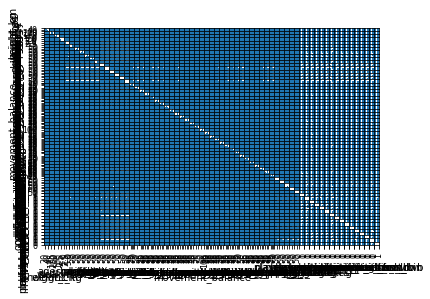

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(fifa_19[useful_features])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

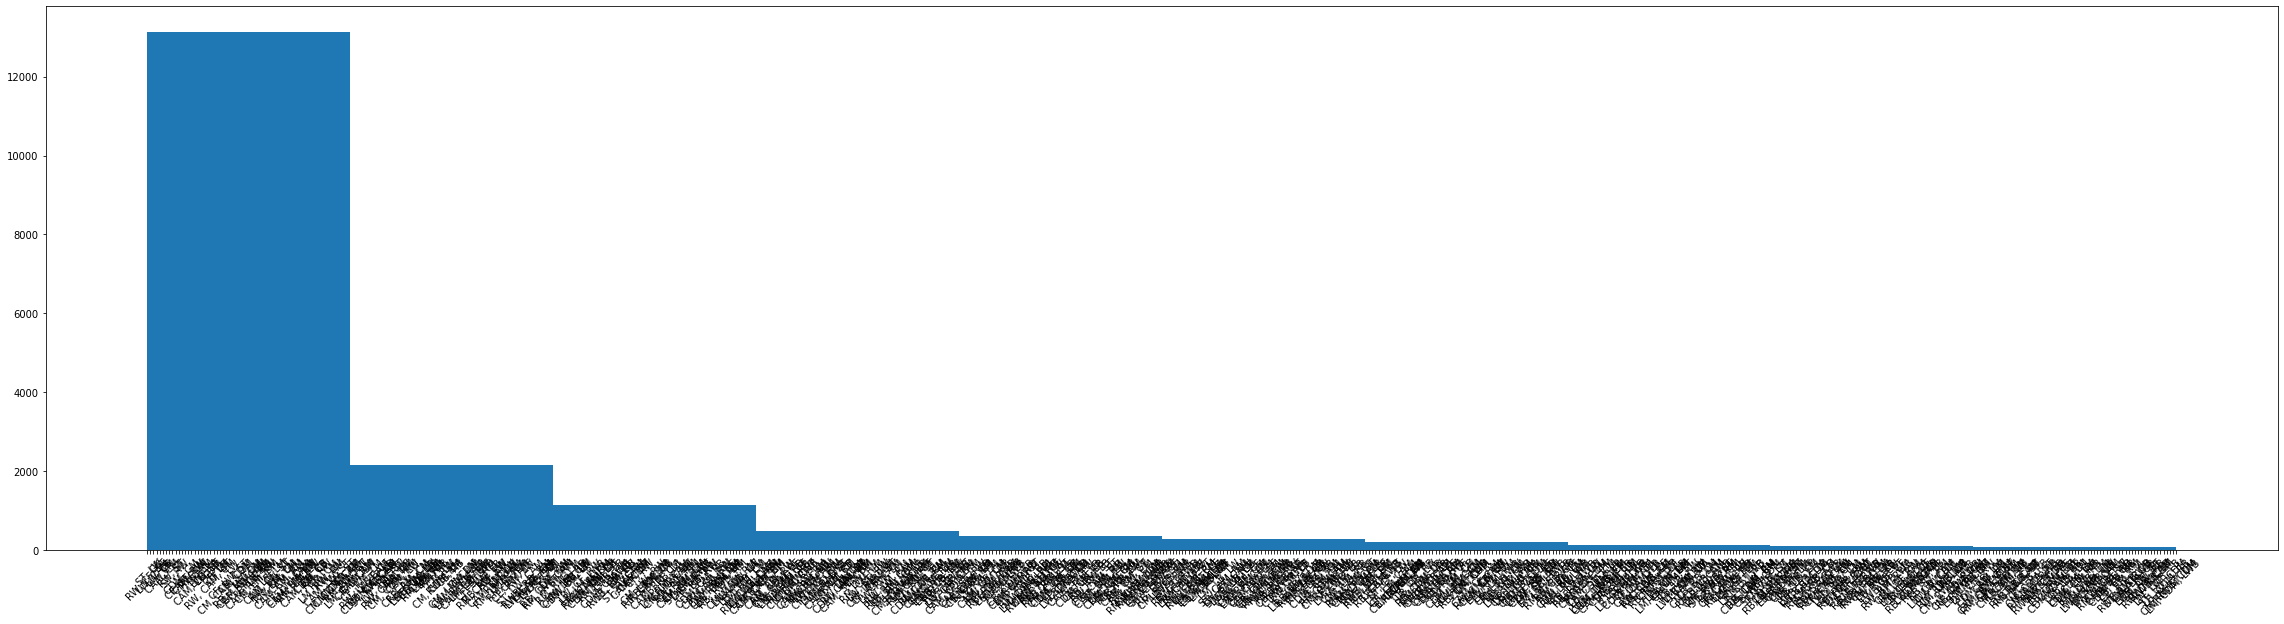

In [20]:
plt.figure(figsize=(40,10))
plt.hist(x=fifa_20.player_positions)
plt.xticks(rotation=45)